# Рекомендация тарифов

## Импорт библиотек

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# sklearn:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# импорт инструмента оценки accuracy
from sklearn.metrics import accuracy_score 

# импорт дерева решений
from sklearn.tree import DecisionTreeClassifier

# импорт метода случайного леса
from sklearn.ensemble import RandomForestClassifier

# импорт метода логистической регрессии
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.datasets import load_iris

from sklearn.dummy import DummyClassifier

## Откройте и изучите файл

In [2]:
df = pd.read_csv('users_behavior.csv')

In [3]:
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


### Вывод:

В исходных данных нет пропусков и ошибок в введенных данных, предобработка данных не требуется

## Разбейте данные на выборки

Выделим параметры и целевой признак:

In [6]:
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']

Разделим исходные данные на тренировочную, валидационную и тестовую выборки:

В тестовую выборку выделим 10% от общего количества значений

In [7]:
features_train, features_test, target_train, target_test = train_test_split(
    features, 
    target, 
    test_size=0.10, 
    random_state=10)

90% от общего количества значений разделим на тренировочную и валидационную выборку в соотношении 80/20 соответственно

In [8]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, 
    target_train, 
    test_size=0.20, 
    random_state=10)

In [9]:
print('Размеры наборов данных для обучения классификаторов:') 
print(f"features_train: {len(features_train)}")
print(f"target_train: {len(target_train)}") 
print(f"features_test: {len(features_test)}") 
print(f"target_test: {len(target_test)}") 
print(f"features_valid: {len(features_valid)}") 
print(f"target_valid: {len(target_valid)}")

Размеры наборов данных для обучения классификаторов:
features_train: 2313
target_train: 2313
features_test: 322
target_test: 322
features_valid: 579
target_valid: 579


## Исследуйте модели

Исследуем различные методы классификации, которые представлены в библиотеке sclearn

### Дерево решений

Дерево принятия решений (также называют деревом классификации или регрессионным деревом) — средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике. Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны признаки, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — признаки, по которым различаются случаи. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение. 

- random_state - Управляет случайностью оценки (int), не является гиперпараметром, необходим для сохранения сида случайности модели и дальнейшем использовании именно той модели, которую мы задаем

Рассмотрим гиперпараметры модели:

    max_depth - Максимальная глубина дерева
    min_samples_split - Минимальное количество выборок, необходимое для разделения внутреннего узла
    min_samples_leaf - Минимальное количество образцов должно быть в листовом узле
    presort - Предварительная сортировка данных

Оптимальные значения гиперпараметра: 
 min_splin: 37
 accuracy: 0.7944732297063903


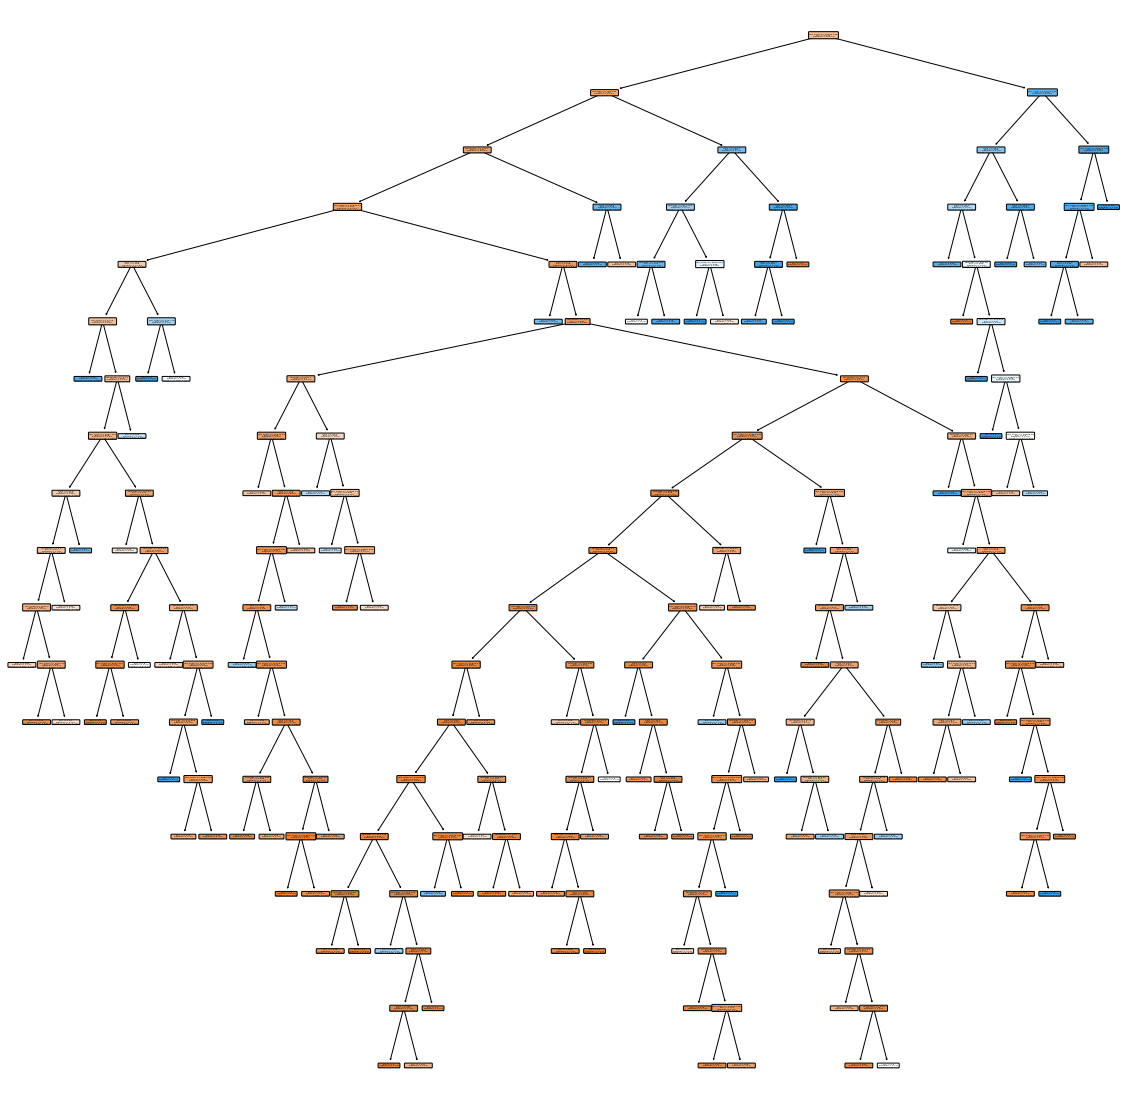

Оптимальные значения гиперпараметра: 
 min_splin_leaf: 23
 accuracy: 0.8221070811744386


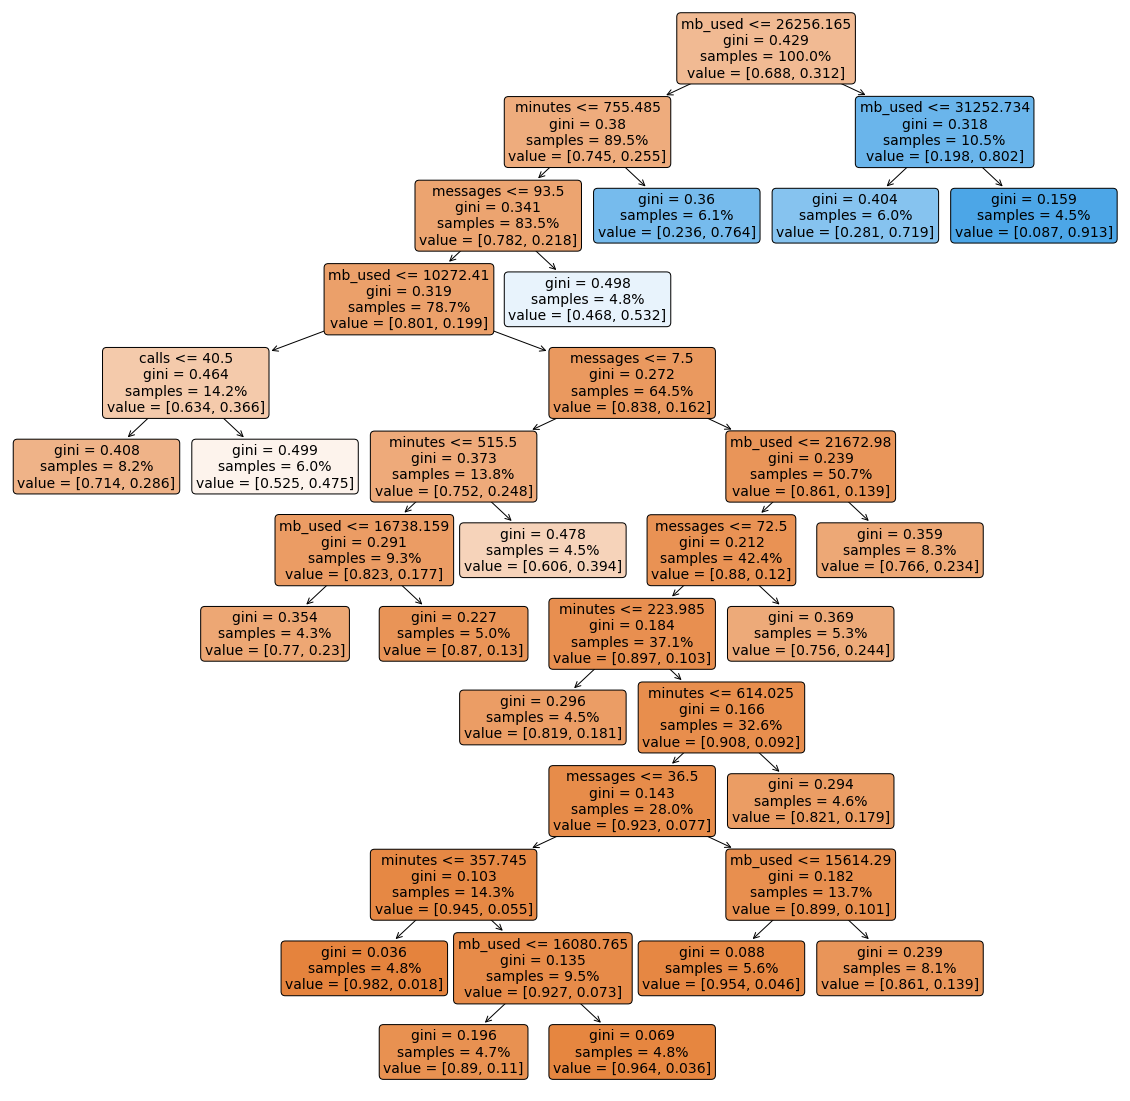

Оптимальные значения гиперпараметра: 
 max_depth: 6
 accuracy: 0.8238341968911918


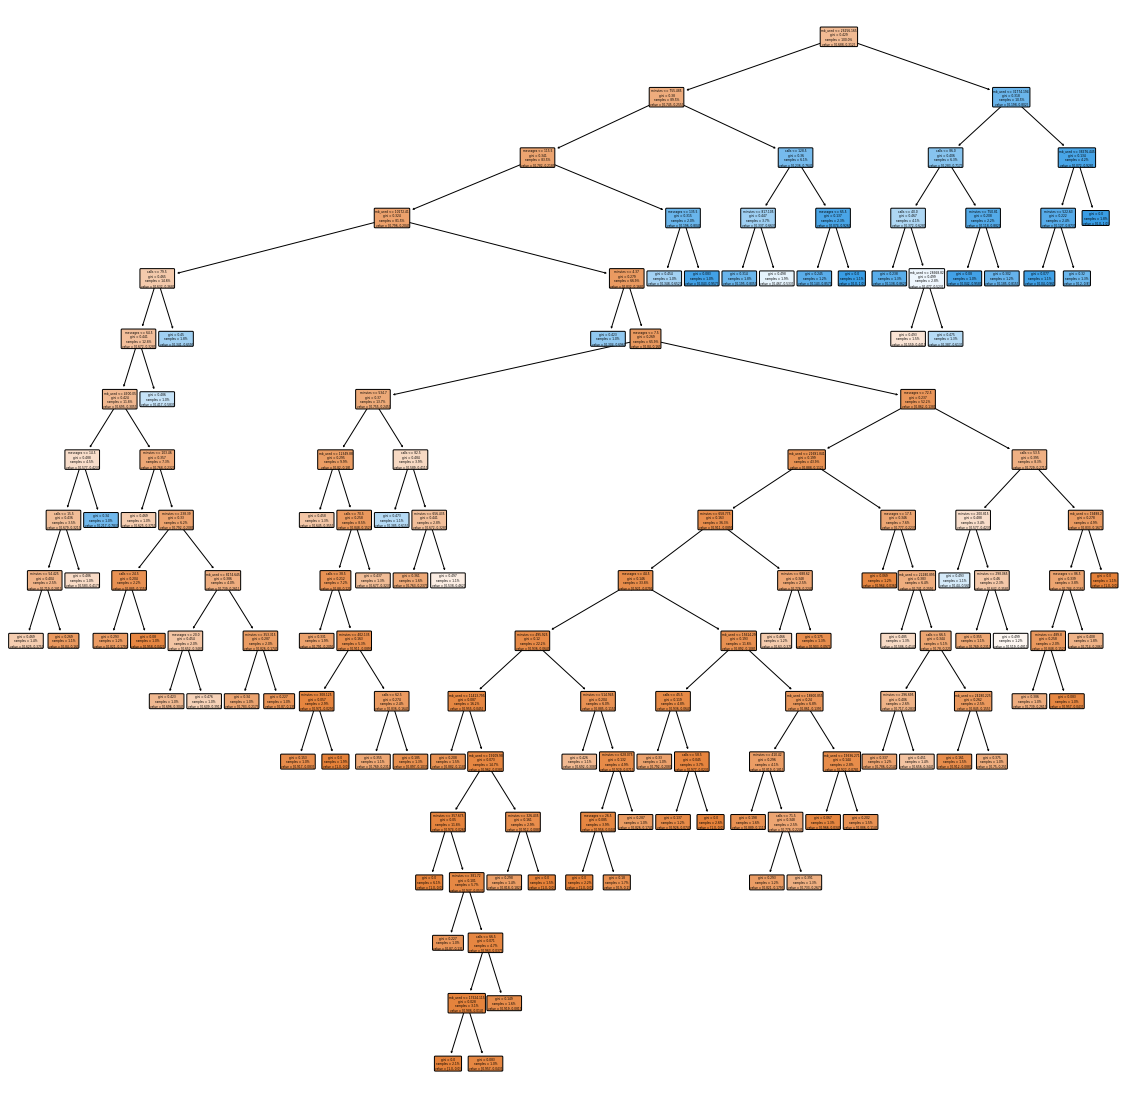

In [10]:
tree_accuracy = 0
min_splin = 0
for i in range(40):
    model = DecisionTreeClassifier(random_state = 42,
                                   presort = True, 
                                   min_samples_split=i+2)
    model.fit(features_train, target_train)
    prediction = model.predict(features_valid)
    accuracy1 = accuracy_score(target_valid, prediction)
    if accuracy1 > tree_accuracy:
        tree_accuracy = accuracy1
        min_splin = i+2
print(f"Оптимальные значения гиперпараметра: \n", f"min_splin: {min_splin}\n" , f"accuracy: {tree_accuracy}") 
plt.figure(figsize=(20,20))
tree.plot_tree(model,
               feature_names=features_train.columns,
               filled=True,
              proportion=True,
              rounded=True)
plt.show()

tree_accuracy = 0
min_splin_leaf_tree = 0
for i in range(100):
    model = DecisionTreeClassifier(random_state = 42,
                                   presort = True,
                                   min_samples_split = min_splin,
                                   min_samples_leaf  = i+1)
    model.fit(features_train, target_train)
    prediction = model.predict(features_valid)
    accuracy1 = accuracy_score(target_valid, prediction)
    if accuracy1 > tree_accuracy:
        tree_accuracy = accuracy1
        min_splin_leaf_tree = i+1
print(f"Оптимальные значения гиперпараметра: \n", f"min_splin_leaf: {min_splin_leaf_tree}\n" , f"accuracy: {tree_accuracy}")        
plt.figure(figsize=(20,20))
tree.plot_tree(model,
               feature_names=features_train.columns,
               filled=True,
              proportion=True,
              rounded=True)
plt.show()


tree_accuracy = 0
tree_max_depth = 0
for i in range(100):
    model = DecisionTreeClassifier(random_state = 42,
                                   presort = True,
                                   min_samples_split = min_splin,
                                   min_samples_leaf  = min_splin_leaf_tree,
                                   max_depth=i+1)
    model.fit(features_train, target_train)
    prediction = model.predict(features_valid)
    accuracy1 = accuracy_score(target_valid, prediction)
    if accuracy1 > tree_accuracy:
        tree_accuracy = accuracy1
        tree_max_depth = i+1
print(f"Оптимальные значения гиперпараметра: \n", f"max_depth: {tree_max_depth}\n" , f"accuracy: {tree_accuracy}")        
plt.figure(figsize=(20,20))
tree.plot_tree(model,
               feature_names=features_train.columns,
               filled=True,
              proportion=True,
              rounded=True)
plt.show()

Обучим итоговую модель

In [11]:
model_tree = DecisionTreeClassifier(random_state = 42,
                               presort = True,
                               min_samples_split = min_splin,
                               min_samples_leaf  = min_splin_leaf_tree,
                               max_depth= tree_max_depth)
model_tree.fit(features_train, target_train)
prediction_tree = model_tree.predict(features_valid)
accuracy = accuracy_score(target_valid, prediction_tree)
accuracy

0.8238341968911918

#### Вывод

Мы разобрали 4 гиперпараметра для метода классификации "Дерево принятия решений", точность предсказания модели ~82.4%

Гиперпараметр "presort" в нашем конкретном случае не влияет на точность предсказания

При помощи визуализации наглядно показаны внияния гиперпараметров на работу модели

### Random Forest

Random forest (с англ. — «случайный лес») — алгоритм машинного обучения, предложенный Лео Брейманом[1][2] и Адель Катлер (англ.)русск., заключающийся в использовании комитета (ансамбля) решающих деревьев. Алгоритм сочетает в себе две основные идеи: метод бэггинга Бреймана, и метод случайных подпространств (англ.)русск., предложенный Тин Кам Хо (англ.)русск.. Алгоритм применяется для задач классификации, регрессии и кластеризации. Основная идея заключается в использовании большого ансамбля решающих деревьев, каждое из которых само по себе даёт очень невысокое качество классификации, но за счёт их большого количества результат получается хорошим. 

Гиперпараметры:

    n_estimators — число «деревьев» в «случайном лесу».
    min_samples_split — минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться.
    min_samples_leaf — минимальное число объектов в листьях.


In [12]:
tree_accuracy = 0
n_estimators_rf = 0
for i in range(100):
    model = RandomForestClassifier(random_state = 42,
                                   n_estimators=i+1)
    model.fit(features_train, target_train)
    prediction = model.predict(features_valid)
    accuracy1 = accuracy_score(target_valid, prediction)
    if accuracy1 > tree_accuracy:
        tree_accuracy = accuracy1
        n_estimators_rf = i+1
    
print(f"Оптимальные значения гиперпараметра: \n", f"n_estimators: {n_estimators_rf}\n" , f"accuracy: {tree_accuracy}")   

tree_accuracy = 0
min_samples_split_rf = 0
for i in range(40):
    model = RandomForestClassifier(random_state = 42,
                                   n_estimators = n_estimators_rf,
                                   min_samples_split=i+2)
    model.fit(features_train, target_train)
    prediction = model.predict(features_valid)
    accuracy1 = accuracy_score(target_valid, prediction)
    if accuracy1 > tree_accuracy:
        tree_accuracy = accuracy1
        min_samples_split_rf = i+2
print(f"Оптимальные значения гиперпараметра: \n", f"min_samples_split: {min_samples_split_rf}\n" , f"accuracy: {tree_accuracy}") 

tree_accuracy = 0
min_splin_leaf_rf = 0
for i in range(100):
    model = RandomForestClassifier(random_state = 42,
                                   n_estimators = n_estimators_rf,
                                   min_samples_split = min_samples_split_rf,
                                   min_samples_leaf  = i+1)
    model.fit(features_train, target_train)
    prediction = model.predict(features_valid)
    accuracy1 = accuracy_score(target_valid, prediction)
    if accuracy1 > tree_accuracy:
        tree_accuracy = accuracy1
        min_splin_leaf_rf = i+1
print(f"Оптимальные значения гиперпараметра: \n", f"min_splin_leaf: {min_splin_leaf_rf}\n" , f"accuracy: {tree_accuracy}")        
     


Оптимальные значения гиперпараметра: 
 n_estimators: 31
 accuracy: 0.8393782383419689
Оптимальные значения гиперпараметра: 
 min_samples_split: 19
 accuracy: 0.846286701208981
Оптимальные значения гиперпараметра: 
 min_splin_leaf: 1
 accuracy: 0.846286701208981


In [13]:
model_rf = RandomForestClassifier(random_state = 42,
                                   n_estimators = n_estimators_rf,
                                   min_samples_split = min_samples_split_rf,
                                   min_samples_leaf  = min_splin_leaf_rf)
model_rf.fit(features_train, target_train)
prediction_rf = model_rf.predict(features_valid)
accuracy = accuracy_score(target_valid, prediction_rf)
accuracy


0.846286701208981

#### Вывод

Метод random forest показыввает лучший результат, чем метод дерева решений, это логично, потому что по сути метод случайного леса решений использует несколько раз предыдущий рассматриваемый метод, что приводит к увеличению точности предстказания

### Метод логистической регрессии

In [14]:
model = LogisticRegression(random_state=42)
model.fit(features_train, target_train)
prediction = model.predict(features_valid)
accuracy = accuracy_score(target_valid, prediction)
accuracy

0.7599309153713298

#### Вывод

Метод логистической регрессии показал наихудший результат без изменения гиперпараметров, чем предыдущие методы

## Проверьте модель на тестовой выборке

Проверим модель Random Forest на тестовой выборке

In [15]:
features_test

,calls,minutes,messages,mb_used
1256,60.0,424.15,66.0,30206.83
986,65.0,474.16,3.0,15983.41
2256,0.0,0.00,42.0,13280.45
237,56.0,469.49,145.0,15877.65
539,71.0,468.08,12.0,22654.23
...,...,...,...,...
175,65.0,429.96,103.0,16508.74
2125,60.0,396.92,20.0,9262.50
2666,66.0,430.01,26.0,10542.80
2116,50.0,305.03,0.0,21391.63


In [16]:
target_test

1256    1
986     1
2256    1
237     1
539     0
       ..
175     0
2125    0
2666    1
2116    0
705     0
Name: is_ultra, Length: 322, dtype: int64

In [17]:
features_test['RF_predict'] = model_rf.predict(features_test) 

In [18]:
features_test['target'] = target_test

In [19]:
features_test['clasificate'] = 'success'
features_test.loc[features_test['target']!=features_test['RF_predict'], 'clasificate'] = 'fail'

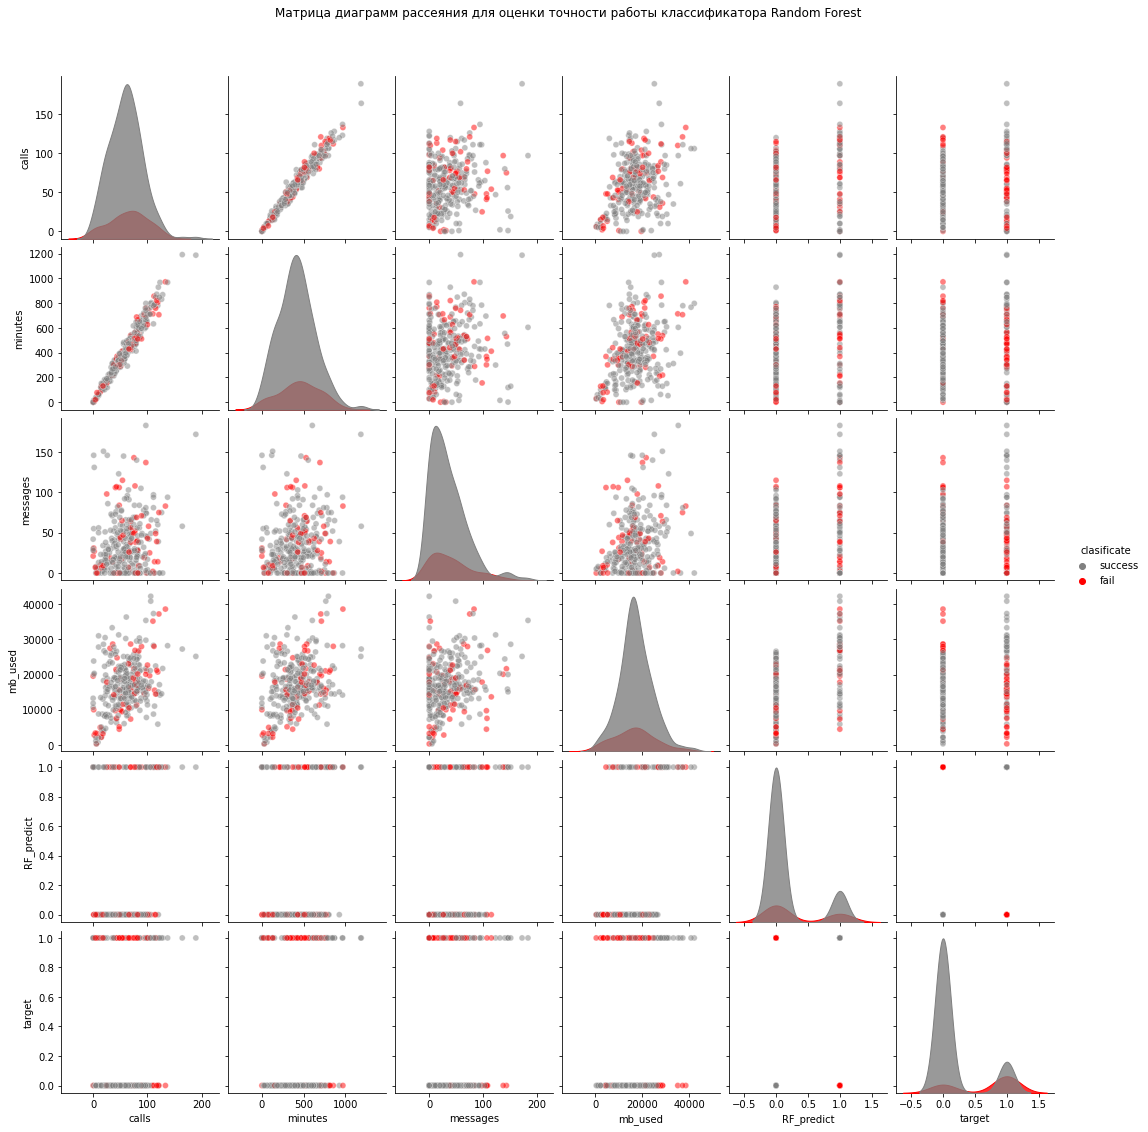

In [20]:
my_color={'success':'#808080', 'fail':'red'}
matrix_plot = sns.pairplot(features_test,
                           hue="clasificate", 
                           kind='scatter', 
                           hue_order = ['success','fail'],
                           diag_kind='auto', 
                           palette=my_color,
                           plot_kws=dict(alpha=0.5),
                           diag_kws=dict(alpha=0.8),
                          )
matrix_plot.fig.suptitle("Матрица диаграмм рассеяния для оценки точности работы классификатора Random Forest", y = 1.05)
plt.show()

In [21]:
features_test.groupby('clasificate').count()

,calls,minutes,messages,mb_used,RF_predict,target
clasificate,,,,,,
fail,60,60,60,60,60,60
success,262,262,262,262,262,262


In [22]:
accuracy = accuracy_score(features_test['target'], features_test['RF_predict'])
accuracy

0.8136645962732919

### Вывод

На тестовой выборке выбранная нами модель показала точность 81.37%

Из представленного графика можно увидеть, что в параметре "messages" достаточное количество значений "Fail" (ошибочно присвоенные классы моделью) находится на нижнем уровне данного параметра, из чего можно сделать вывод, что RF с трудом обрабатывает граничные значения параметров выборки.

## Проверка на адекватность

Для проверки на адекватность будем использовать константную модель

In [23]:
dummy_clf = DummyClassifier(constant = 0)
dummy_clf.fit(features_train, target_train)
predict = dummy_clf.predict(features_test)
accuracy_score(target_test, predict)


0.5807453416149069

In [24]:
dummy_clf = DummyClassifier(constant = 1)
dummy_clf.fit(features_train, target_train)
predict = dummy_clf.predict(features_test)
accuracy_score(target_test, predict)


0.6273291925465838

### Вывод

Точность константной модели при заполнении нулями ~ 62,7%, что меньше полученной нами точности модели Random Forest (~ 81,4%)

## Итоговый вывод

По итогам проведенной работы можно сделать следующие выводы:
1. В данных, предоставленных для проведения исследования не найдено пропусков или ошибок в заполении, предобработка данных не потребовалась
2. Исходный массив данных был разделен на следующие выборки:

In [25]:
print('Размеры наборов данных для обучения классификаторов:') 
print(f"features_train: {len(features_train)}")
print(f"target_train: {len(target_train)}") 
print(f"features_test: {len(features_test)}") 
print(f"target_test: {len(target_test)}") 
print(f"features_valid: {len(features_valid)}") 
print(f"target_valid: {len(target_valid)}")

Размеры наборов данных для обучения классификаторов:
features_train: 2313
target_train: 2313
features_test: 322
target_test: 322
features_valid: 579
target_valid: 579


3. В исследовании обучены три типа классификаторов:
    1. Дерево принятия решений (точность после обучения на тренировочной выборке ~82.4%)
    2. Метод Random Forest (точность после обучения на тренировочной выборке ~84.6%)
    3. Метод логистической регрессии (точность после обучения на тренировочной выборке ~69.6%)

4. Для работы с тестовой выборкой была выбрана модель классификатора Random Forest, точность работы модели на тестовой выборке ~ 81,4%
5. Была проведена проверка на адекватность построенной модели.

        Была реализована константная модель (данные заполняются нулями), точность модели составила ~62,7%

__В результате проведенного исследования была обучена модель классификатора Random Forest, которая с точностью 81.4% на тестовой выборке может определить какому пользователю стоит предложить премиальный тарифный план "Ultra"__